In [3]:
import polars as pl
import matplotlib.pyplot as plt
file_path = r'C:\Users\ramya\Downloads\openpolicing.parquet'
lf = pl.scan_parquet(file_path)

Data Exploration

In [4]:
lf.limit(50).collect()

date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,violation,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,service_area,officer_race,lat,lng,geocode_source,beat,division,officer_sex,disposition,posted_speed,district,precinct,speed,contraband_other,vehicle_type,officer_age,officer_years_of_service,unit,notes,sector,subsector,officer_assignment,use_of_force_description,department_id,contraband_alcohol,zone,region,neighborhood,reporting_area,reason_for_arrest,subdistrict,police_grid_number,use_of_force_reason,charged_speed,subdivision,substation
date,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f32,f32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
2000-01-06,"""23:25:00""","""Unknown""",null,"""23""","""white""","""female""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""TRUE""","""FALSE""","""citation""",null,null,null,"""FALSE""","""FALSE""","""FALSE""","""FALSE""",null,null,null,"""Speed Limit Violation""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2000-01-06,"""23:55:00""","""Unknown""",null,"""19""","""white""","""female""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""TRUE""","""FALSE""","""citation""",null,null,null,"""FALSE""","""FALSE""","""FALSE""","""FALSE""",null,null,null,"""Speed Limit Violation""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2000-01-06,"""21:36:00""","""Unknown""",null,"""22""","""black""","""male""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""TRUE""","""FALSE""","""citation""",null,null,null,"""FALSE""","""FALSE""","""FALSE""","""FALSE""",null,null,null,"""Safe Movement Violation""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2000-01-07,"""02:30:00""","""Unknown""",null,"""14""","""black""","""male""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""FALSE""","""FALSE""",null,null,null,null,"""FALSE""","""FALSE""","""FALSE""","""FALSE""",null,null,null,"""Safe Movement Violation""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2000-01-07,"""04:15:00""","""Unknown""",null,"""19""","""black""","""male""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""FALSE""","""TRUE""","""warning""",null,null,null,"""FALSE""","""FALSE""","""FALSE""","""FALSE""",null,null,null,"""Safe Movement Violation""",null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
2000-01-12,"""16:00:00""","""Unknown""",null,"""20""","""white""","""female""","""22e35044ed""","""UNC Greensboro University Poli…","""vehicular""","""FALSE""","""TRUE""

In [5]:
columns = list(lf.schema.keys())
columns

C:\Users\ramya\AppData\Local\Temp\ipykernel_21196\3417325164.py:1: PerformanceWarning: Resolving the schema of a LazyFrame is a potentially expensive operation. Use `LazyFrame.collect_schema()` to get the schema without this warning.
  columns = list(lf.schema.keys())


['date',
 'time',
 'location',
 'county_name',
 'subject_age',
 'subject_race',
 'subject_sex',
 'officer_id_hash',
 'department_name',
 'type',
 'arrest_made',
 'citation_issued',
 'warning_issued',
 'outcome',
 'contraband_found',
 'contraband_drugs',
 'contraband_weapons',
 'frisk_performed',
 'search_conducted',
 'search_person',
 'search_vehicle',
 'search_basis',
 'reason_for_frisk',
 'reason_for_search',
 'reason_for_stop',
 'violation',
 'vehicle_color',
 'vehicle_make',
 'vehicle_model',
 'vehicle_registration_state',
 'vehicle_year',
 'service_area',
 'officer_race',
 'lat',
 'lng',
 'geocode_source',
 'beat',
 'division',
 'officer_sex',
 'disposition',
 'posted_speed',
 'district',
 'precinct',
 'speed',
 'contraband_other',
 'vehicle_type',
 'officer_age',
 'officer_years_of_service',
 'unit',
 'notes',
 'sector',
 'subsector',
 'officer_assignment',
 'use_of_force_description',
 'department_id',
 'contraband_alcohol',
 'zone',
 'region',
 'neighborhood',
 'reporting_area'

In [6]:
options = {}
for col in columns:
    if col == 'officer_age':
        break
    val = lf.select(pl.col(col).unique()).collect()
    options[col] = val

In [7]:
start = False
for col in columns:
    if col == 'officer_age':
        start = True
    if start:
        val = lf.select(pl.col(col).unique()).collect()
        options[col] = val
options

{'date': shape: (8_034, 1)
 ┌────────────┐
 │ date       │
 │ ---        │
 │ date       │
 ╞════════════╡
 │ null       │
 │ 1971-01-05 │
 │ 1971-04-25 │
 │ 1971-05-17 │
 │ 1973-06-21 │
 │ …          │
 │ 2020-11-01 │
 │ 2020-11-02 │
 │ 2020-11-03 │
 │ 2020-11-04 │
 │ 2020-11-19 │
 └────────────┘,
 'time': shape: (86_401, 1)
 ┌──────────┐
 │ time     │
 │ ---      │
 │ str      │
 ╞══════════╡
 │ 13:19:15 │
 │ 21:12:25 │
 │ 09:03:50 │
 │ 21:30:17 │
 │ 07:12:35 │
 │ …        │
 │ 13:48:37 │
 │ 14:23:10 │
 │ 23:08:42 │
 │ 14:22:26 │
 │ 07:43:42 │
 └──────────┘,
 'location': shape: (5_889_523, 1)
 ┌─────────────────────────────┐
 │ location                    │
 │ ---                         │
 │ str                         │
 ╞═════════════════════════════╡
 │ 100 BLOCK DURFUR            │
 │ MD RT 4 SB @ WHITE SANDS DR │
 │ HWY 411 FORESTRY            │
 │ 6000 Blk Of TELEGRAPH AVE   │
 │ I10 247.5                   │
 │ …                           │
 │ 230 SAGAMORE ST.            │
 │

Basic Question: Can geographic/location data show disparities in outcomes?

In [8]:
clean = lf.drop_nulls()
clean.limit(50).collect()

date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,violation,vehicle_color,vehicle_make,vehicle_model,vehicle_registration_state,vehicle_year,service_area,officer_race,lat,lng,geocode_source,beat,division,officer_sex,disposition,posted_speed,district,precinct,speed,contraband_other,vehicle_type,officer_age,officer_years_of_service,unit,notes,sector,subsector,officer_assignment,use_of_force_description,department_id,contraband_alcohol,zone,region,neighborhood,reporting_area,reason_for_arrest,subdistrict,police_grid_number,use_of_force_reason,charged_speed,subdivision,substation
date,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,f32,f32,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str


Do some counties conduct more searches than others?

In [9]:
clean = lf.select(['county_name', 'search_conducted']).drop_nulls().collect()
clean


county_name,search_conducted
str,str
"""Guilford County""","""FALSE"""
"""Guilford County""","""FALSE"""
"""Guilford County""","""FALSE"""
"""Guilford County""","""FALSE"""
"""Guilford County""","""FALSE"""
…,…
"""Jackson County""","""FALSE"""
"""Jackson County""","""FALSE"""
"""Jackson County""","""FALSE"""


In [10]:
temp = clean.filter(pl.col('search_conducted') == 'TRUE')
temp = temp.with_columns((pl.col('search_conducted') == 'TRUE').cast(pl.Int8).alias('search_conducted_int'))
temp

county_name,search_conducted,search_conducted_int
str,str,i8
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
"""Guilford County""","""TRUE""",1
…,…,…
"""Wake County""","""TRUE""",1
"""Hoke County""","""TRUE""",1
"""Hoke County""","""TRUE""",1


In [11]:
search_true = temp.group_by('county_name').agg(pl.col('search_conducted_int').sum().alias('search_count'))
search_true

county_name,search_count
str,i64
"""Highland County""",1072
"""Dane County""",245
"""Carbon County""",9
"""Glades County""",5
"""Giles County""",175
…,…
"""Armstrong County""",429
"""Wichita County""",2954
"""Taylor County""",1821


([<matplotlib.patches.Wedge at 0x2016ac3c950>,
 [Text(1.0999434912490762, 0.011149711152919833, 'Highland County'),
  Text(1.099719363811028, 0.024845942507137047, 'Dane County'),
  Text(1.099656519990091, 0.027487052284360294, 'Carbon County'),
  Text(1.0996528717201381, 0.027632620535399846, 'Glades County'),
  Text(1.0996042486294537, 0.02950417590876002, 'Giles County'),
  Text(1.0942895304936222, 0.11193937400239591, 'Sumter County'),
  Text(1.0825018161921465, 0.19542215314724334, 'McCormick County'),
  Text(1.0787249648594306, 0.215296191766182, 'Seward County'),
  Text(1.072344774477279, 0.24510545618421897, 'Dimmit County'),
  Text(1.0618874729511203, 0.2870452835172247, 'Chester County'),
  Text(1.0524213801058815, 0.3200144351369664, 'Stanton County'),
  Text(1.0491423678903113, 0.3306059465549748, 'Morrill County'),
  Text(1.0111163046354201, 0.43317873735954826, 'Lorain County'),
  Text(0.9504527960895192, 0.5537503791471523, 'Pittsylvania County'),
  Text(0.92810353814214

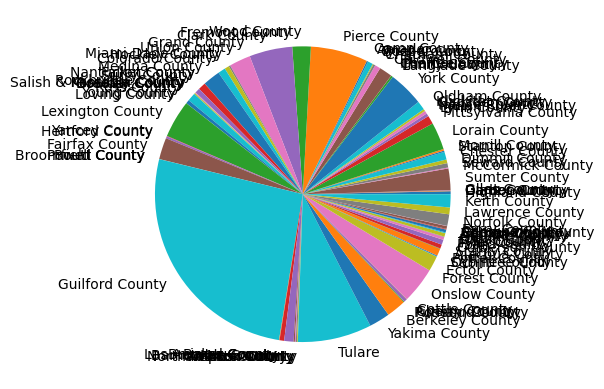

In [12]:
county_name = search_true.select('county_name').slice(0,100).to_numpy().flatten()
search_count = search_true.select('search_count').slice(0,100).to_numpy().flatten()

plt.pie(search_count, labels=county_name)